In [14]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wind = xr.open_dataset('wind.nc')


In [4]:
wind = wind.assign(speed= np.sqrt(wind.u**2 + wind.v**2))

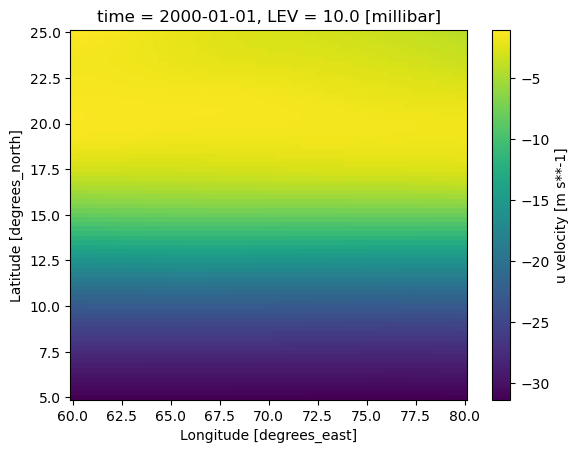

In [23]:
u = wind.u
u.sel(LEV=10)[0].plot.imshow()

In [17]:
speed = wind.speed

In [18]:
speed100 = speed.sel(LEV=100)

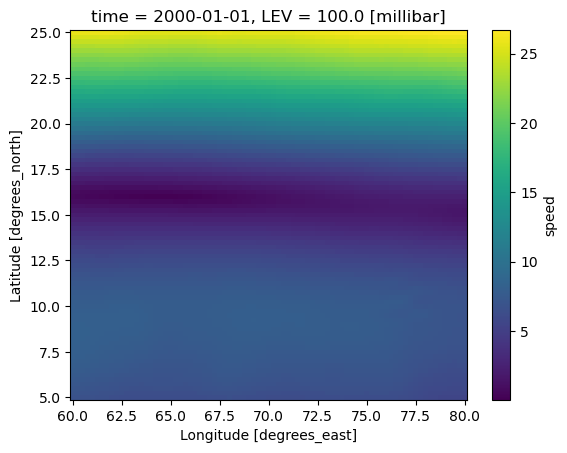

In [19]:
speed100[0].plot.imshow()

In [7]:
len(speed)

253

In [8]:
speed = speed.sel(LEV=10)

In [9]:
len(speed)

253

In [10]:
wind 

<xarray.Dataset>
Dimensions:    (time: 253, LEV: 6, latitude: 81, longitude: 81)
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-01-01
  * LEV        (LEV) float64 10.0 20.0 30.0 50.0 70.0 100.0
  * latitude   (latitude) float64 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
  * longitude  (longitude) float64 60.0 60.25 60.5 60.75 ... 79.5 79.75 80.0
Data variables:
    u          (time, LEV, latitude, longitude) float32 -31.3 -31.29 ... 23.79
    v          (time, LEV, latitude, longitude) float32 -0.04454 ... 2.72
    speed      (time, LEV, latitude, longitude) float32 31.3 31.29 ... 23.95
Attributes: (12/28)
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.6, ACDD-1.3
    creator_name:               APDRC
    creator_type:               institution
    creator_url:                http://apdrc.soest.hawaii.edu/thredds/dodsC/l...
    Easternmost_Easting:        80.0
    ...                         ...
    standard_name_vocabulary:   CF Standard Name Table v29
    summary:                    Reanalysis Data ERA5 monthly 3d Wind velocities
    time_coverage_end:          2021-01-01T00:00:00Z
    time_coverage_start:        2000-01-01T00:00:00Z
    title:                      Reanalysis Data ERA5 monthly 3d Wind velocities
    Westernmost_Easting:        60.0

In [15]:
start = pd.to_datetime('2000-01-01')
start + np.timedelta64(1, 'M')

for i in range(len(speed)):
    day = start + np.timedelta64(i, 'M')
    t = speed[i].plot.imshow(vmin=speed.min(), vmax=speed.max())
    t = t.figure
    t.delaxes(t.axes[1])
    plt.axis('off')
    plt.title('')
    plt.savefig(f"hawaii_speed/level10/{day.strftime('%Y-%m')}.png", bbox_inches='tight')
    plt.clf()

<Figure size 640x480 with 0 Axes>

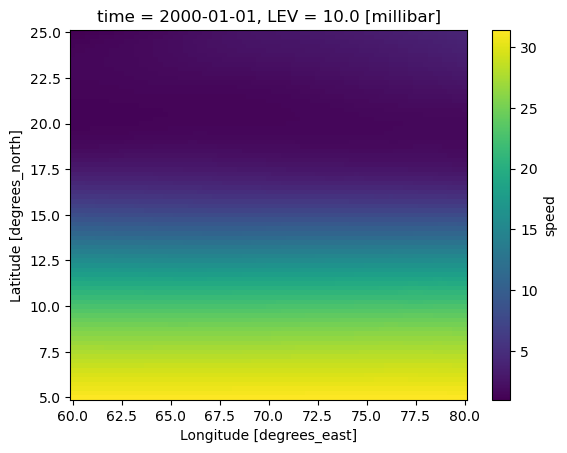

In [16]:
speed[0].plot.imshow()